In [7]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
#import seaborn as sns
#sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [8]:
data = np.load('/Users/louisribieras/Desktop/my_invictus/data/latest_coin_data.pkl')

In [9]:
new_data = data.dropna()
new_data = new_data.T
new_data.index = pd.to_datetime(new_data.index)

In [10]:
bitcoin = new_data['bitcoin'].apply(pd.Series)
dash = new_data['dash'].apply(pd.Series)
ethereum = new_data['ethereum'].apply(pd.Series)
bitcoindark = new_data['bitcoindark'].apply(pd.Series)
monero = new_data['monero'].apply(pd.Series)
litecoin = new_data['litecoin'].apply(pd.Series)
omni = new_data['omni'].apply(pd.Series)
factom = new_data['factom'].apply(pd.Series)
blocknet = new_data['blocknet'].apply(pd.Series)
counterparty = new_data['counterparty'].apply(pd.Series)
cloakcoin = new_data['cloakcoin'].apply(pd.Series)

In [11]:
bitcoin.head()

,open_price,high_price,low_price,close_price,volume,market_cap
2018-07-04,6550.87,6771.92,6450.46,6597.55,4.176690e+09,1.122140e+11
2018-07-03,6596.66,6671.37,6447.75,6529.59,4.672310e+09,1.129890e+11
2018-07-02,6380.38,6683.86,6305.70,6614.18,4.396930e+09,1.092730e+11
2018-07-01,6411.68,6432.85,6289.29,6385.82,4.788260e+09,1.097970e+11
2018-06-30,6214.22,6465.51,6214.22,6404.00,4.543860e+09,1.064050e+11


In [12]:
#keep only close price
bitcoin = bitcoin.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
dash = dash.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
ethereum = ethereum.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
bitcoindark = bitcoindark.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
monero = monero.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
litecoin = litecoin.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
omni = omni.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
factom = factom.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
blocknet = blocknet.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
counterparty = counterparty.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)


In [13]:
#Merging all dataframes
df1 = bitcoin.merge(dash, how='outer', left_index=True, right_index=True)
df2 = df1.merge(ethereum, how='outer', left_index=True, right_index=True)
df3 = df2.merge(bitcoindark, how='outer', left_index=True, right_index=True)
df4 = df3.merge(monero, how='outer', left_index=True, right_index=True)
df5 = df4.merge(litecoin, how='outer', left_index=True, right_index=True)
df6 = df5.merge(omni, how='outer', left_index=True, right_index=True)
df7 = df6.merge(factom, how='outer', left_index=True, right_index=True)
df8 = df7.merge(blocknet, how='outer', left_index=True, right_index=True)
final = df8.merge(counterparty, how='outer', left_index=True, right_index=True)

In [14]:
final.columns = ['bitcoin', 'dash', 'ethereum', 'bitcoindark', 'monero', 
                 'litecoin','omni', 'factom', 'blocknet', 'counterparty']

In [15]:
final = final.iloc[::-1]

In [16]:
final.head()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2016-01-01,434.33,3.38,0.948024,1.04,0.497867,3.51,2.78,0.591518,0.030604,0.606546
2016-01-02,433.44,3.28,0.937124,1.10,0.532668,3.50,2.17,0.654944,0.036112,0.541655
2016-01-03,430.01,3.24,0.971905,1.08,0.500312,3.48,2.19,0.645078,0.079823,0.546483
2016-01-04,433.09,3.32,0.954480,1.03,0.517388,3.50,2.17,0.587863,0.035083,0.576058
2016-01-05,431.96,3.33,0.950176,1.08,0.499272,3.47,2.25,0.623585,0.032682,0.554794


In [17]:
#Calculating short-window simple moving average
short_rolling = final.rolling(window=20).mean()
short_rolling.head(20)

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Calculating long-window simple moving average
long_rolling = final.rolling(window=100).mean()
long_rolling.tail()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2018-06-30,7778.6425,354.9178,564.4541,73.7333,184.9124,126.2430,27.8199,19.4108,17.4838,13.8068
2018-07-01,7753.7045,353.0002,563.5971,73.0940,184.0710,125.3671,27.6979,19.2694,17.4157,13.7455
2018-07-02,7733.1651,351.2520,563.0862,72.3259,183.3844,124.6234,27.5829,19.1480,17.3690,13.6762
2018-07-03,7713.5032,349.5175,562.4852,72.1786,182.6512,123.8736,27.4626,19.0125,17.3144,13.6176
2018-07-04,7697.3847,348.0607,562.2589,72.0362,182.0634,123.2363,27.3654,18.8790,17.2768,13.5724


In [19]:
# Relative returns
returns = final.pct_change(1)
returns.head()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,-0.002049,-0.029586,-0.011498,0.057692,0.069900,-0.002849,-0.219424,0.107226,0.179976,-0.106984
2016-01-03,-0.007913,-0.012195,0.037115,-0.018182,-0.060743,-0.005714,0.009217,-0.015064,1.210429,0.008913
2016-01-04,0.007163,0.024691,-0.017929,-0.046296,0.034131,0.005747,-0.009132,-0.088695,-0.560490,0.054119
2016-01-05,-0.002609,0.003012,-0.004509,0.048544,-0.035014,-0.008571,0.036866,0.060766,-0.068438,-0.036913


In [20]:
# Log returns - because log returns are additive
log_returns = np.log(final).diff()
log_returns.head()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,-0.002051,-0.030032,-0.011564,0.056089,0.067565,-0.002853,-0.247724,0.101858,0.165495,-0.113151
2016-01-03,-0.007945,-0.012270,0.036442,-0.018349,-0.062666,-0.005731,0.009174,-0.015178,0.793186,0.008874
2016-01-04,0.007137,0.024391,-0.018091,-0.047402,0.033561,0.005731,-0.009174,-0.092877,-0.822095,0.052705
2016-01-05,-0.002613,0.003008,-0.004519,0.047402,-0.035642,-0.008608,0.036203,0.058991,-0.070892,-0.037611


Converting between cumulative log return c(t) and total relative return crelative(t):

crelative(t)=ec(t)−1

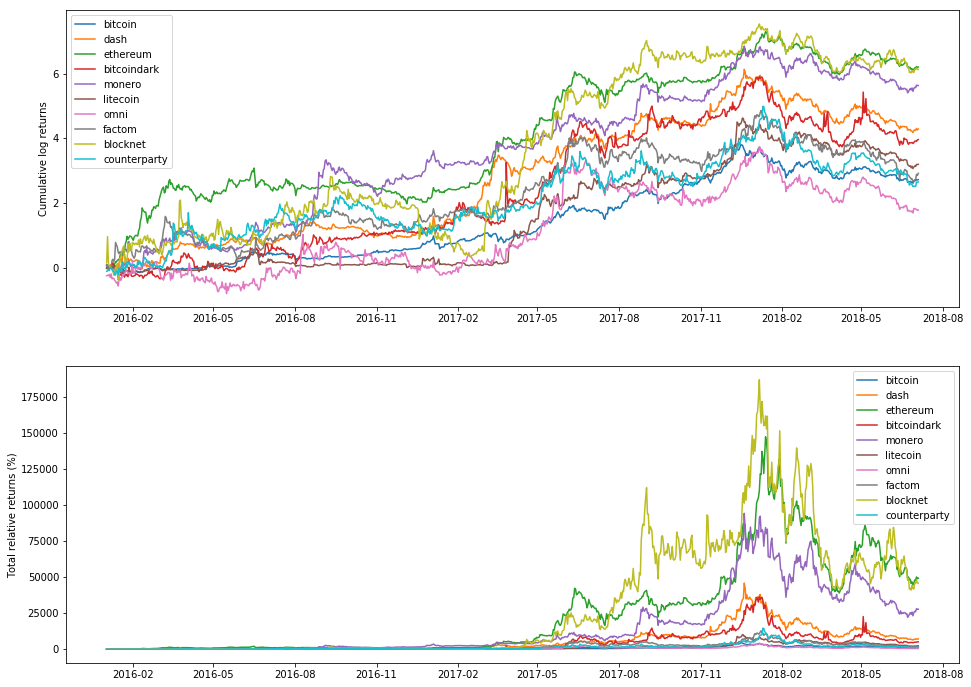

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [22]:
#Returns of last day
r_t = log_returns.tail(1).transpose()
r_t

,2018-07-04 00:00:00
bitcoin,0.010354
dash,0.028335
ethereum,0.006720
bitcoindark,0.007003
monero,-0.000433
litecoin,0.004572
omni,0.009750
factom,0.067165
blocknet,-0.004977
counterparty,0.018758


In [23]:
#equal weighting for each coin
weights_vector = pd.DataFrame(1 / 10, index=r_t.index, columns=r_t.columns)
weights_vector

,2018-07-04 00:00:00
bitcoin,0.1
dash,0.1
ethereum,0.1
bitcoindark,0.1
monero,0.1
litecoin,0.1
omni,0.1
factom,0.1
blocknet,0.1
counterparty,0.1


In [24]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2018-07-04 00:00:00
2018-07-04,0.014725


In [25]:
weights_matrix = pd.DataFrame(1 / 10, index=final.index, columns=final.columns)
weights_matrix.tail()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2018-06-30,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2018-07-01,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2018-07-02,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2018-07-03,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2018-07-04,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [26]:
log_returns.head()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,-0.002051,-0.030032,-0.011564,0.056089,0.067565,-0.002853,-0.247724,0.101858,0.165495,-0.113151
2016-01-03,-0.007945,-0.012270,0.036442,-0.018349,-0.062666,-0.005731,0.009174,-0.015178,0.793186,0.008874
2016-01-04,0.007137,0.024391,-0.018091,-0.047402,0.033561,0.005731,-0.009174,-0.092877,-0.822095,0.052705
2016-01-05,-0.002613,0.003008,-0.004519,0.047402,-0.035642,-0.008608,0.036203,0.058991,-0.070892,-0.037611


In [27]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00
2016-01-01,NaN,-0.001637,0.072554,-0.086611,-0.001428
2016-01-02,NaN,-0.001637,0.072554,-0.086611,-0.001428
2016-01-03,NaN,-0.001637,0.072554,-0.086611,-0.001428
2016-01-04,NaN,-0.001637,0.072554,-0.086611,-0.001428
2016-01-05,NaN,-0.001637,0.072554,-0.086611,-0.001428


In [28]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

#Note that these returns are only estimates because of our use of log-returns instead of relative returns. 
#However, for most practical purposes the difference is negligible

2018-06-30    0.033924
2018-07-01   -0.005346
2018-07-02    0.059804
2018-07-03   -0.016409
2018-07-04    0.014725
dtype: float64

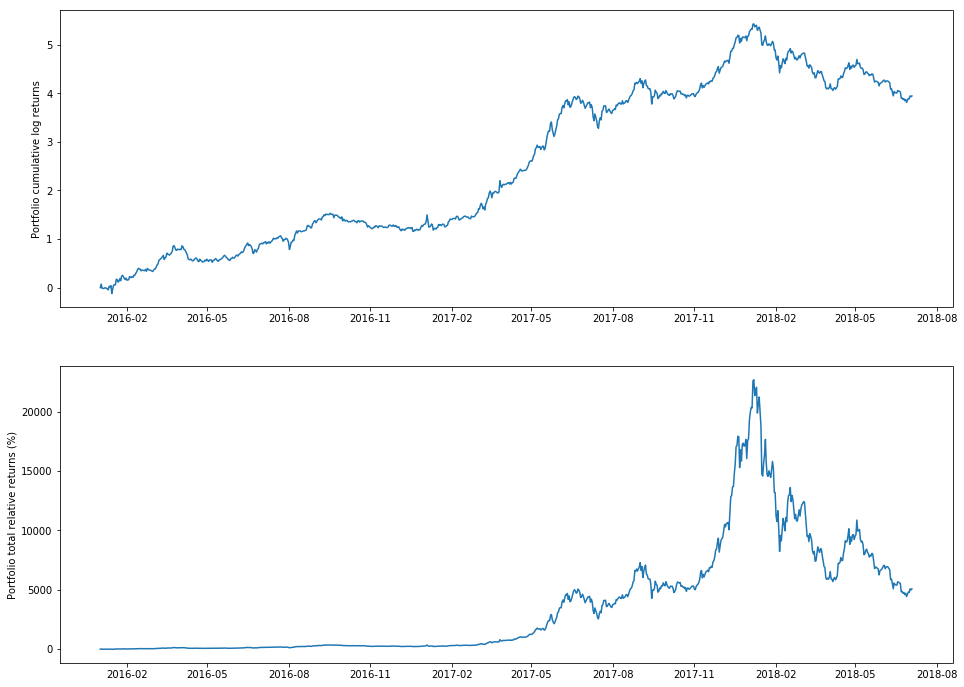

In [29]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [30]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = final.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 5073.43%
Average yearly return is: 206.51%


^Doesn't seem realistic but am not sure where the mistake is at yet.

In [31]:
# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

bitcoin         1.459545
dash            1.625405
ethereum        2.092029
bitcoindark     1.101860
monero          1.795996
litecoin        1.325784
omni            1.087585
factom          1.233857
blocknet        1.702287
counterparty    1.187394
dtype: float64
